<a href="https://colab.research.google.com/github/adarithanmayee26/heart-/blob/main/Heart_stress_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [2]:
file_path = "/content/sample_data/heart_rate_non_linear_features_test.csv"

df = pd.read_csv(file_path)

In [3]:
print(df.head())

                                   uuid        SD1         SD2    sampen  \
0  62b75db5-bc40-4c8f-9166-daf0efcab4c2   8.347898  115.862444  2.209659   
1  a99549ad-3eb6-4413-bc90-9053e7f7e684  14.542096   77.118903  2.186132   
2  cb573d3a-c767-4556-b32e-ad8c08ded214   9.799336  125.044377  2.051571   
3  47a0c6de-2aef-4ac3-997d-252fa6fd07f1  11.639185  302.029812  2.080910   
4  de3fd54f-c74e-4fe8-bf2a-7a127f68b312   7.266567   72.579248  2.068728   

     higuci  datasetId      condition  
0  1.100715          2  time pressure  
1  1.290615          2      no stress  
2  1.226663          2      no stress  
3  1.085143          2  time pressure  
4  1.252547          2   interruption  


In [4]:
df = df.drop(columns=['uuid'])

In [5]:
X = df.drop(columns=['condition'])
y = df['condition']

In [6]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [7]:
y_categorical = to_categorical(y_encoded)

In [8]:
# ===============================
# 6. Feature Scaling
# ===============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================
# 7. Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42
)

# ===============================
# 8. Build ANN Model
# ===============================
model = Sequential()

# Input Layer + Hidden Layer 1
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# Hidden Layer 2
model.add(Dense(32, activation='relu'))

# Output Layer
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# ===============================
# 9. Compile Model
# ===============================
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ===============================
# 10. Train Model
# ===============================
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2
)

# ===============================
# 11. Evaluate Model
# ===============================
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# ===============================
# 12. Predictions
# ===============================
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Accuracy Score:", accuracy_score(y_true, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))
print("Classification Report:\n", classification_report(y_true, y_pred_classes))


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1642/1642 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5961 - loss: 0.8891 - val_accuracy: 0.6429 - val_loss: 0.7971
Epoch 2/50
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6589 - loss: 0.7677 - val_accuracy: 0.6686 - val_loss: 0.7325
Epoch 3/50
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6963 - loss: 0.6932 - val_accuracy: 0.6971 - val_loss: 0.6761
Epoch 4/50
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7153 - loss: 0.6447 - val_accuracy: 0.7106 - val_loss: 0.6304
Epoch 5/50
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7301 - loss: 0.6028 - val_accuracy: 0.7409 - val_loss: 0.5920
Epoch 6/50
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7496 - loss: 0.5684 - val_accuracy: 0.7543 - val_loss: 0.5675
Epoch 7/50
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7649 - loss: 0.5432 - val_accuracy: 0.7572 - val_loss: 0.5562
Epoch 8/50
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7737 - loss: 0.5296 - val_accurac

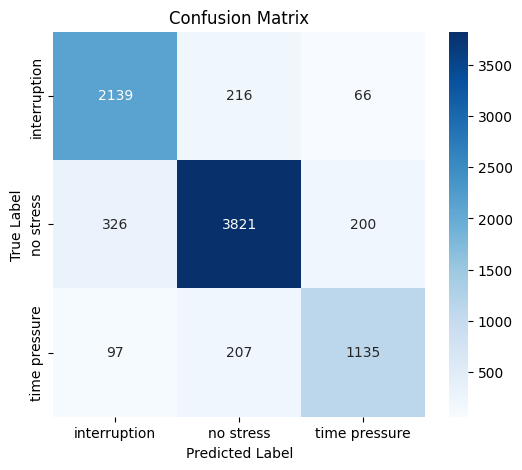

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Rebuild model properly (to remove warning)
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [10]:
import joblib

In [11]:
model.save("stress_ann_model.keras")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

# Save label encoder
joblib.dump(label_encoder, "label_encoder.pkl")

print("✅ Model, Scaler and Label Encoder saved successfully!")


✅ Model, Scaler and Label Encoder saved successfully!


In [12]:
import gradio as gr
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# Load Saved Model + Scaler + Encoder

model = load_model("stress_ann_model.keras")
scaler = joblib.load("scaler.pkl")
label_encoder = joblib.load("label_encoder.pkl")

def predict_stress(SD1, SD2, sampen, higuci, datasetId):

    input_data = np.array([[SD1, SD2, sampen, higuci, datasetId]])

    input_scaled = scaler.transform(input_data)

    prediction = model.predict(input_scaled)

    predicted_class = np.argmax(prediction, axis=1)

    result = label_encoder.inverse_transform(predicted_class)

    return result[0]

# ===============================
# Gradio Interface
# ===============================
interface = gr.Interface(
    fn=predict_stress,
    inputs=[
        gr.Number(label="SD1"),
        gr.Number(label="SD2"),
        gr.Number(label="Sample Entropy"),
        gr.Number(label="Higuchi"),
        gr.Number(label="Dataset ID")
    ],
    outputs="text",
    title="💓 Stress Condition Prediction (ANN Model)",
    description="Enter heart rate nonlinear features to predict stress condition."
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4f501d2d32e2ed84af.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
